In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import gammainc, gamma
from functions_for_simulation import *

In [2]:
## initializing

np.random.seed(10)

rowNum, colNum = (200, 300)

Xs = Xs_generator(rowNum, colNum)
# Xs = np.random.normal(0, 4, n)
Ws_1 = np.ones(rowNum) 
Ws_0 = np.zeros(rowNum)

Ys_1 = Ys_generator(Xs, Ws_1)
Ys_0 = Ys_generator(Xs, Ws_0)

tau = np.average(Ys_1['y']) - np.average(Ys_0['y'])
# # If we use the same eps, tau will be the constant 1.0 

print("The average treatment effect tau: {0:.3f}".format(tau))


The average treatment effect tau: 0.231


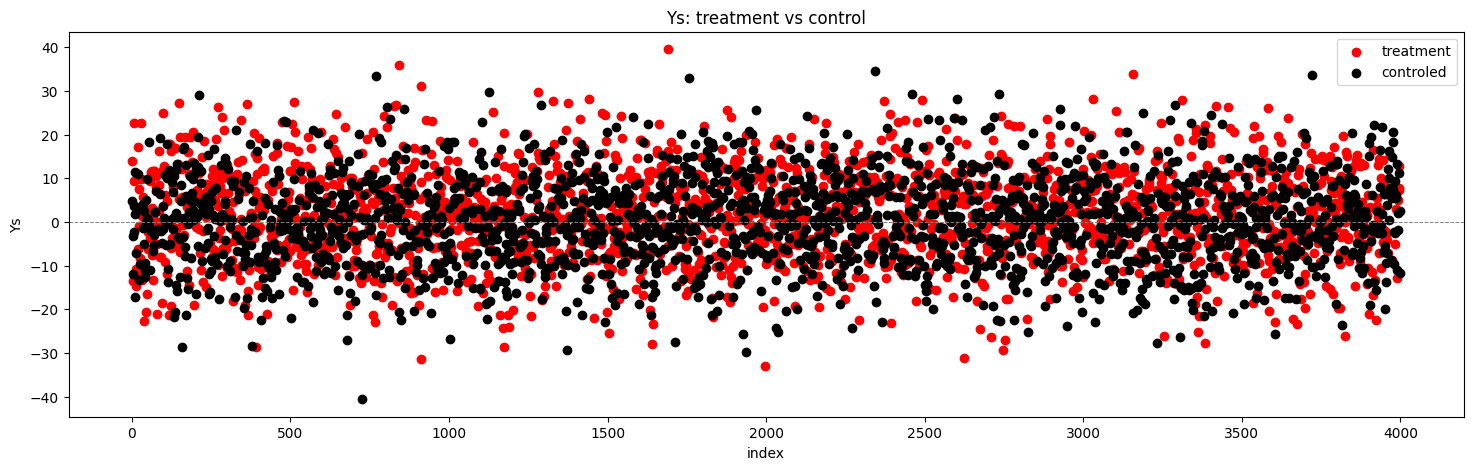

In [7]:
Ws_equal_size = Ws_generator_equal_size(Xs)
df_equal_size = Ys_generator(Xs, Ws_equal_size)
randomization_output_plot(df_equal_size)

----- Unaccepted Rerandomization ----- 
Ws: [0 1 1 ... 0 1 0]
Mahalanobis_distance = 2055.923 
a = 2000
----- Unaccepted Rerandomization ----- 
Ws: [0 1 0 ... 0 1 0]
Mahalanobis_distance = 2013.902 
a = 2000
----- Unaccepted Rerandomization ----- 
Ws: [0 1 1 ... 0 0 1]
Mahalanobis_distance = 2034.608 
a = 2000
----- Unaccepted Rerandomization ----- 
Ws: [1 1 0 ... 1 1 1]
Mahalanobis_distance = 2039.834 
a = 2000
----- Accepted Rerandomization ----- 
Mahalanobis_distance = 1969.202 
 threshold: a = 2000
Accepted Ws: [0 1 0 ... 1 0 1]


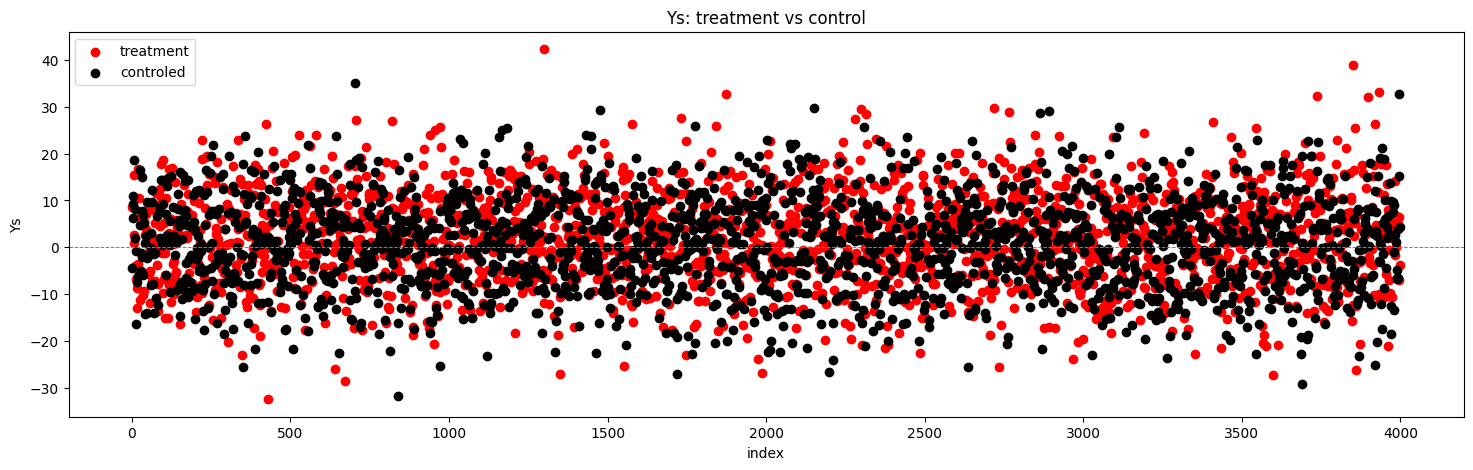

In [10]:
Ws_rerandomization = Ws_generator_rerandomization(Xs, 2000, ifPrint = True)
df_rerandomization = Ys_generator(Xs, Ws_rerandomization)
randomization_output_plot(df_rerandomization)

THEOREM 2.1. Suppose $\sum_{i=1}^n W_i=\sum_{i=1}^n\left(1-W_i\right)$ and $\varphi(\mathbf{x}, \mathbf{W})=\varphi(\mathbf{x}$, $\mathbf{1}-\mathbf{W}) ;$ then $\mathbb{E}(\hat{\tau} \mid \mathbf{x}, \varphi=1)=\tau$.

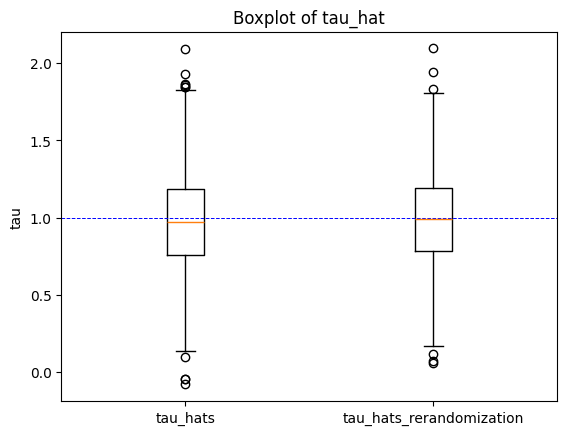

In [15]:
tau_hats = []

iterNum = 1000
for i in range(iterNum):
    Ws = Ws_generator_equal_size(Xs)
    df = Ys_generator(Xs, Ws)
    tau_hats.append(tau_hat_calculator(df))
    # print("The estimated average treatment effect tau_hat {0:.3f} with Ws {1}.".format(tau_hat, Ws))

tau_hats_rerandomization = []
## 需要及时更改threshold a
a = 2050
for i in range(iterNum):
    Ws = Ws_generator_rerandomization(Xs, a, ifPrint=False)
    df = Ys_generator(Xs, Ws)
    tau_hats_rerandomization.append(tau_hat_calculator(df))

# boxplot
plt.boxplot([tau_hats, tau_hats_rerandomization])
plt.xticks([1, 2], ['tau_hats', 'tau_hats_rerandomization'])
# plt.boxplot(tau_hats_rerandomization)
plt.title('Boxplot of tau_hat')

# plt.axhline(y=3, color='blue', linestyle='--')
plt.axhline(y=1, color='blue', linestyle='--', linewidth = 0.7)

# add axis label
plt.ylabel('tau')

plt.show()

THEOREM 3.1. Assume rerandomization is conducted using $\varphi_M$ with $p_w=1 / 2$, and the covariate means are multivariate normal; then
$$
\operatorname{cov}\left(\overline{\mathbf{X}}_T-\overline{\mathbf{X}}_C \mid \mathbf{x}, \varphi_M=1\right)=v_a \operatorname{cov}\left(\overline{\mathbf{X}}_T-\overline{\mathbf{X}}_C \mid \mathbf{x}\right),
$$
where
$$
v_a \equiv \frac{2}{k} \times \frac{\gamma(k / 2+1, a / 2)}{\gamma(k / 2, a / 2)}=\frac{P\left(\chi_{k+2}^2 \leq a\right)}{P\left(\chi_k^2 \leq a\right)}
$$
and $\gamma$ denotes the incomplete gamma function: $\gamma(b, c) \equiv \int_0^c y^{b-1} e^{-y} d y$.
We will verify the result using simulation.

In [6]:
iterNum = 500
diff_T_C1s = []
for i in range(iterNum):
    Ws = Ws_generator_rerandomization(Xs, a, ifPrint=False)
    diff_T_C1s.append(diff_T_C_calculator(Xs, Ws))
cov_diff1 = np.cov(diff_T_C1s)
# print("-----cov of diff after rerandomization-----")


diff_T_C2s = []
for i in range(iterNum):
    Ws = Ws_generator_equal_size(Xs)
    diff_T_C2s.append(diff_T_C_calculator(Xs, Ws))
cov_diff2 = np.cov(diff_T_C2s)
# print("cov of diff : {0}".format([[round(num, 4) for num in row] for row in cov_diff2]))

k = colNum
va = 2/k * (gammainc(k/2+1, a/2) * gamma(k/2+1)) / (gammainc(k/2, a/2) * gamma(k/2))
print("Difference between cov of diff after rerandomization and cov of diff * va")
print(cov_diff1 - va*cov_diff2)
print(np.linalg.norm(cov_diff1 - va*cov_diff2, ord=2))

# print("va: {0:.4f}".format(va))
# print("va * cov of diff : {0}".format([[round(num, 4) for num in row] for row in cov_diff2*va]))

# # boxplot 
# plt.boxplot([diff_T_C1s, diff_T_C2s], labels=['rerandomization', 'equal_size'])
# plt.title('Boxplot of X_T^bar - X_C^bar')

# # add axis label
# plt.ylabel('X_T^bar - X_C^bar')

# plt.show()

Difference between cov of diff after rerandomization and cov of diff * va
[[ 2.15189763e-04 -1.18435234e-03  3.48791758e-04 ...  1.84658716e-03
   1.38144097e-03 -1.53835708e-04]
 [-1.18435234e-03  9.31663088e-05  4.88174020e-05 ...  1.13386071e-03
  -1.39567800e-03  6.85983750e-04]
 [ 3.48791758e-04  4.88174020e-05  2.71508601e-04 ...  1.81384073e-03
   1.60785966e-03 -8.28978278e-04]
 ...
 [ 1.84658716e-03  1.13386071e-03  1.81384073e-03 ... -3.77774369e-03
  -2.88555919e-03  1.33049387e-03]
 [ 1.38144097e-03 -1.39567800e-03  1.60785966e-03 ... -2.88555919e-03
   1.98855488e-03  4.90640770e-04]
 [-1.53835708e-04  6.85983750e-04 -8.28978278e-04 ...  1.33049387e-03
   4.90640770e-04  1.32338246e-03]]
0.16252096023841853


THEOREM 3.2. If (a) rerandomization is conducted using $\varphi_M$ with $p_w=$ $1 / 2$, (b) the covariate and outcome means are normally distributed, and (c) the treatment effect is additive, then the percent reduction in variance of $\hat{\tau}$ is
$$
 100(1-v_a) R^2 ,
$$
where $R^2$ represents the squared multiple correlation between $\mathbf{y}$ and $\mathbf{x}$ within a treatment group.

In [8]:
import statsmodels.api as sm
y = df['y']
# X = df.drop(['y'], axis=1)
Xs = sm.add_constant(Xs)
model = sm.OLS(y, Xs).fit()
R_square = model.rsquared

In [10]:
iterNum = 5000
tau_hats = []; tau_hats_rerandomization = []

for i in range(iterNum):
    Ws = Ws_generator_equal_size(Xs)
    df = Ys_generator(Xs, Ws)
    # print("R_square: {0:.3f}".format(R_square))
    tau_hats.append(tau_hat_calculator(df))

for i in range(iterNum):
    Ws = Ws_generator_rerandomization(Xs, a, ifPrint=False)
    df = Ys_generator(Xs, Ws)
    tau_hats_rerandomization.append(tau_hat_calculator(df))

# print(va)
# print(np.cov(tau_hats))
# print(np.cov(tau_hats_rerandomization))

print(100 * (np.cov(tau_hats) - np.cov(tau_hats_rerandomization)) / np.cov(tau_hats))

# R_square = np.corrcoef(Xs, Ys_1)[0,1] ** 2

print(100 * (1 - va) * R_square)

13.185318805305105
17.42355113956909
